c:\Users\nolan\anaconda3\envs\Nolan_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6128 - loss: 0.7505 - val_accuracy: 0.6026 - val_loss: 0.7172
Epoch 2/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6003 - loss: 0.7410 - val_accuracy: 0.6093 - val_loss: 0.7001
Epoch 3/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6450 - loss: 0.6881 - val_accuracy: 0.6291 - val_loss: 0.6836
Epoch 4/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 0.6598 - val_accuracy: 0.6490 - val_loss: 0.6679
Epoch 5/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6177 - loss: 0.6728 - val_accuracy: 0.6556 - val_loss: 0.6535
Epoch 6/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6547 - loss: 0.6786 - val_accuracy: 0.6821 - val_loss: 0.6398
Epoch 7/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6820 - loss: 0.5952 - val_accuracy: 0.7020 - val_loss: 0.6272
Epoch 8/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6469 - loss: 0.6373 - val_accuracy: 0.7020 - val_loss: 0.6152
Epoch 9

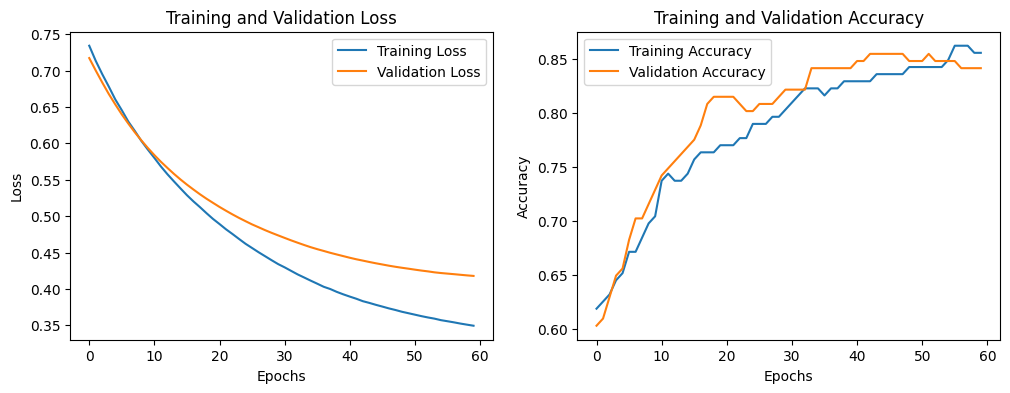

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8685 - loss: 0.4035  
Validation Loss: 0.41781309247016907
Validation Accuracy: 0.8410596251487732


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the dataset
# Assuming the dataset is loaded as heart_data
# Adjust the path to where your dataset is located
heart_data = pd.read_csv('heart.csv')

# 2. Clean the data by removing the first column (id)
heart_data = heart_data.drop(columns=['id'])

# 3. Split the dataset into training and validation sets:
# Even rows for training, odd rows for validation
train_data = heart_data.iloc[::2, :]
val_data = heart_data.iloc[1::2, :]

# Separate the features and target
X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values

X_val = val_data.drop(columns=['target']).values
y_val = val_data['target'].values

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 4. Describe / Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# 5. Prepare the model: compile and summarize
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# 6. Train the model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 7. Analyze history of loss and accuracy on train and validation sets
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 8. Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
